In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
# Load datasets
df = pd.read_csv('0_all.csv')
# df = pd.read_csv('3_4_all_split_vtype.csv')
df['Facility Type'].unique()

array(['ED', 'Med/Surg/Inpatient', 'Other', 'BC', 'SCU', 'ICU', 'ACU',
       'Outpatient physical therapy', 'ER', 'ER ', 'ACU ', 'OB',
       'Acute Care Hospital?', 'Lab', 'ER room 11', 'Cary Medical '],
      dtype=object)

In [72]:
df['Facility Type'].value_counts()

,count
Facility Type,
Other,648
ED,331
BC,204
Med/Surg/Inpatient,163
Acute Care Hospital?,77
ER,33
SCU,26
ACU,12
ER,10


In [116]:
other_departments = df[df['Facility Type'] == 'Other']['Department/Office Incident Took Place'].value_counts()
other_departments

,count
Department/Office Incident Took Place,
Emergency Department,39
Patient Unit - Psych/Behavioral Health,20
Patient Unit - Medical/Surgical,10
Outpt Practice - Specialties,4
Hallway,3
Cardiac Unit - G4,3
Outpt Practice - Primary Care & Walk-in,3
Therapies (PT/OT/Speech),2
"Patient Services (Call Center, Registration, Scheduling, Billing)",2


In [74]:
df['Department/Office Incident Took Place'].unique()

array(['Nurses station', 'Patient room', 'Behavioral health unit',
       'Hallway', 'Laboratory/therapeutic phlebotomy', 'Admitting office',
       'Lobby/switchboard', 'Treatment area', 'ED common area',
       'Triage area', 'Registration window', 'Radiology room',
       'Call came in to ED', 'ED parking Lot', 'Patient room / Facebook',
       'ED nurses station', 'ED hallway & bathroom common area',
       'Patient room & hallway', 'Oncology', 'ED Room 11', 'ICU', 'ED',
       'ACU', 'ED room 10', 'Outpatient physical therapy', 'ER',
       'ED room 5', 'ED 11', 'ACU room 206', 'ER room 11', 'ED room 11',
       'ACU room 204', 'ER ', 'Er room 3', 'ER room 10', 'ER room 3',
       'ER triage', 'ER room 5', 'OB', 'ACU ', 'ER room 2', 'ER room 7',
       'Ed', 'OBGYM', 'ED ', 'Admin', 'Front desk', 'Parking lot',
       'Pines women and children ', 'WC', 'ACU room 212 ', 'ER Hallway',
       'Er hallway ', 'ACU 202', 'Outside main entrance ',
       'ER waiting room', 'ER Ambulance 

# Map

In [117]:
# Step 1: Clean the 'Facility Type' column
df['Facility Type'] = df['Facility Type'].str.strip()
df['Facility Type'] = df['Facility Type'].replace({
    'Acute Care Hospital?': 'Acute Care Hospital',
    'ER ': 'ER',
    'ER room 11': 'ER',
    'ACU ': 'ACU',
    'Cary Medical ': 'Cary Medical'
})

In [118]:
df['Facility Type'].unique()
df['Facility Type'].value_counts()

,count
Facility Type,
Other,648
ED,331
BC,204
Med/Surg/Inpatient,163
Acute Care Hospital,77
ER,44
SCU,26
ACU,15
OB,4


In [119]:
# Step 2: Define a function to map departments under 'Other' Facility Type
def map_department(department):
    if pd.isna(department):
        return 'Other'
    department = str(department).strip().lower()
    if 'emergency' in department or 'ed' in department or 'er' in department:
        return 'ED/ER'
    elif 'psych' in department or 'behavioral' in department:
        return 'Behavioral Health Unit'
    elif 'medical/surgical' in department or 'med/surg' in department or 'medical surgical' in department:
        return 'Med/Surg/Inpatient'
    elif 'outpt' in department or 'outpatient' in department:
        return 'Outpatient'
    elif 'cardiac' in department or 'scu' in department:
        return 'Cardiac Unit'
    elif 'intensive care' in department or 'icu' in department:
        return 'ICU'
    elif 'hallway' in department or 'common area' in department or 'lobby' in department or 'parking' in department or 'grounds' in department:
        return 'Common Areas'
    elif 'lab' in department or 'radiology' in department or 'imaging' in department or 'ct scan' in department:
        return 'Diagnostic Services'
    elif 'therapy' in department or 'pt/ot' in department:
        return 'Therapies'
    elif 'surgery' in department or 'peri-op' in department:
        return 'Surgery & Peri-Op'
    elif 'ob' in department or 'women' in department or 'children' in department:
        return 'OB/Women & Children'
    elif 'care mgmt' in department or 'social work' in department:
        return 'Care Management'
    elif 'patient service' in department or 'registration' in department or 'scheduling' in department:
        return 'Patient Services'
    elif 'admin' in department or 'admitting' in department:
        return 'Administration'
    else:
        return 'Other Department'

In [120]:
# Step 3: Create 'General Location' column
df['General Location'] = df.apply(
    lambda row: map_department(row['Department/Office Incident Took Place'])
    if row['Facility Type'] == 'Other'
    else row['Facility Type'], axis=1
)

In [121]:
# df['General Location'].unique()
# len(df['General Location'].unique())
df['General Location'].value_counts()

,count
General Location,
Other,541
ED,331
BC,204
Med/Surg/Inpatient,163
Acute Care Hospital,77
ED/ER,60
ER,44
SCU,26
Behavioral Health Unit,20


In [122]:
# Step 4: Standardize General Locations
general_location_mapping = {
    'ER': 'ED/ER',
    'ED': 'ED/ER',
    'Outpatient physical therapy': 'Outpatient',
    'Ambulatory Care Unit': 'Outpatient',
    'ACU': 'Ambulatory Care Unit',
    'SCU': 'Special Care Unit',
    'OB': 'OB/Women & Children',
    'Lab': 'Diagnostic Services',
    'Other Department': 'Other'
}
df['General Location'] = df['General Location'].replace(general_location_mapping)

# Further Map

As we seen from the first graph, there still are too many locations.

In [123]:
# Define the mapping dictionary
location_group_map = {
    # Clinical Units
    'ED/ER': 'Clinical Unit',
    'Med/Surg/Inpatient': 'Clinical Unit',
    'ICU': 'Clinical Unit',
    'Cardiac Unit': 'Clinical Unit',
    'Special Care Unit': 'Clinical Unit',
    'Behavioral Health Unit': 'Clinical Unit',
    'OB/Women & Children': 'Clinical Unit',
    'Outpatient': 'Clinical Unit',
    'Ambulatory Care Unit': 'Clinical Unit',
    'BC': 'Clinical Unit',

    # Support Services
    'Diagnostic Services': 'Support Service',
    'Care Management': 'Support Service',
    'Patient Services': 'Support Service',

    # Administrative / Shared
    'Administration': 'Administrative/Shared',
    'Common Areas': 'Administrative/Shared',

    # Facility / Location
    'Cary Medical': 'Facility/Location',
    'Acute Care Hospital': 'Facility/Location',

    # To Clarify
    'Other': 'Other'
}

# Map the new column
df['General Advanced Location'] = df['General Location'].map(location_group_map)

In [124]:
# df['General Advanced Location'].unique()
# len(df['General Advanced Location'].unique())
df['General Advanced Location'].value_counts()

,count
General Advanced Location,
Clinical Unit,880
Other,543
Facility/Location,78
Administrative/Shared,9
Support Service,7


<ipython-input-125-6b0988af0a04>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




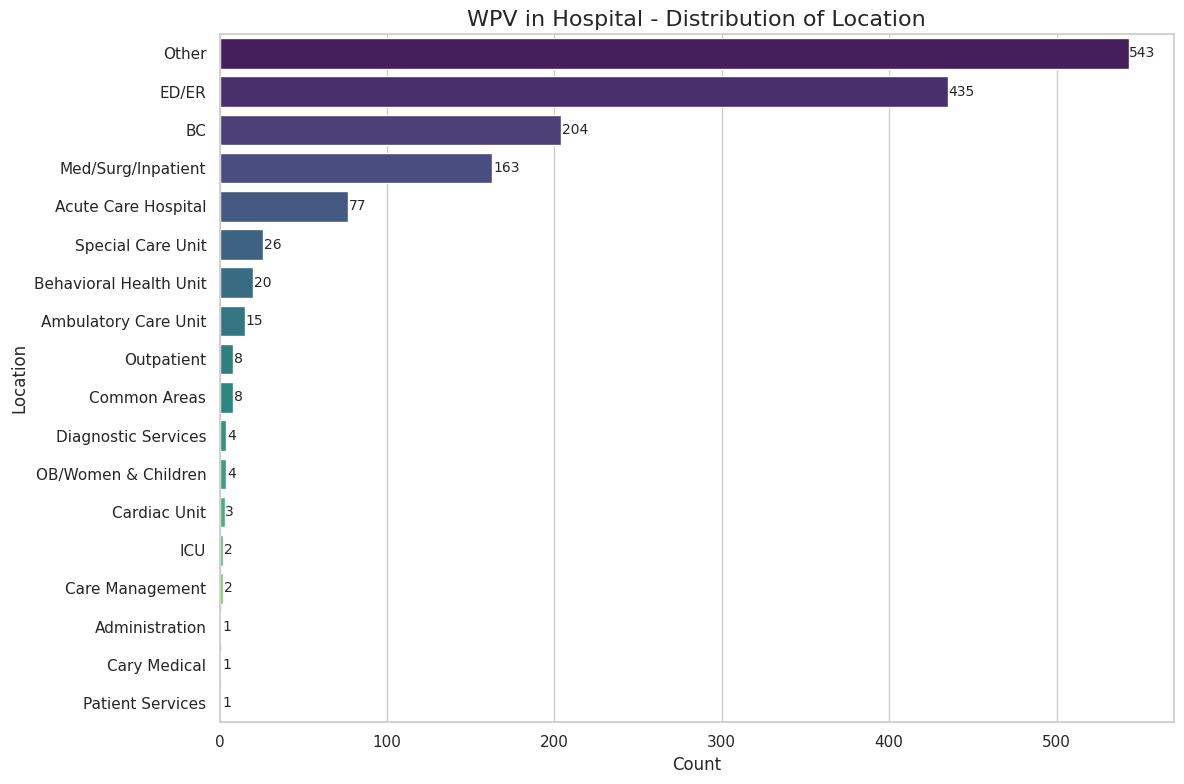

In [125]:
# Step 5: Visualization
plt.figure(figsize=(12, 8))
location_counts = df['General Location'].value_counts().sort_values(ascending=False)
bar_plot = sns.barplot(x=location_counts.values, y=location_counts.index, palette="viridis")
plt.title('WPV in Hospital - Distribution of Location', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Location', fontsize=12)

# Add value labels
for i, count in enumerate(location_counts):
    bar_plot.text(count + 0.5, i, f"{count}", va="center", fontsize=10)

plt.tight_layout()
plt.show()

<ipython-input-126-05d58db0942f>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




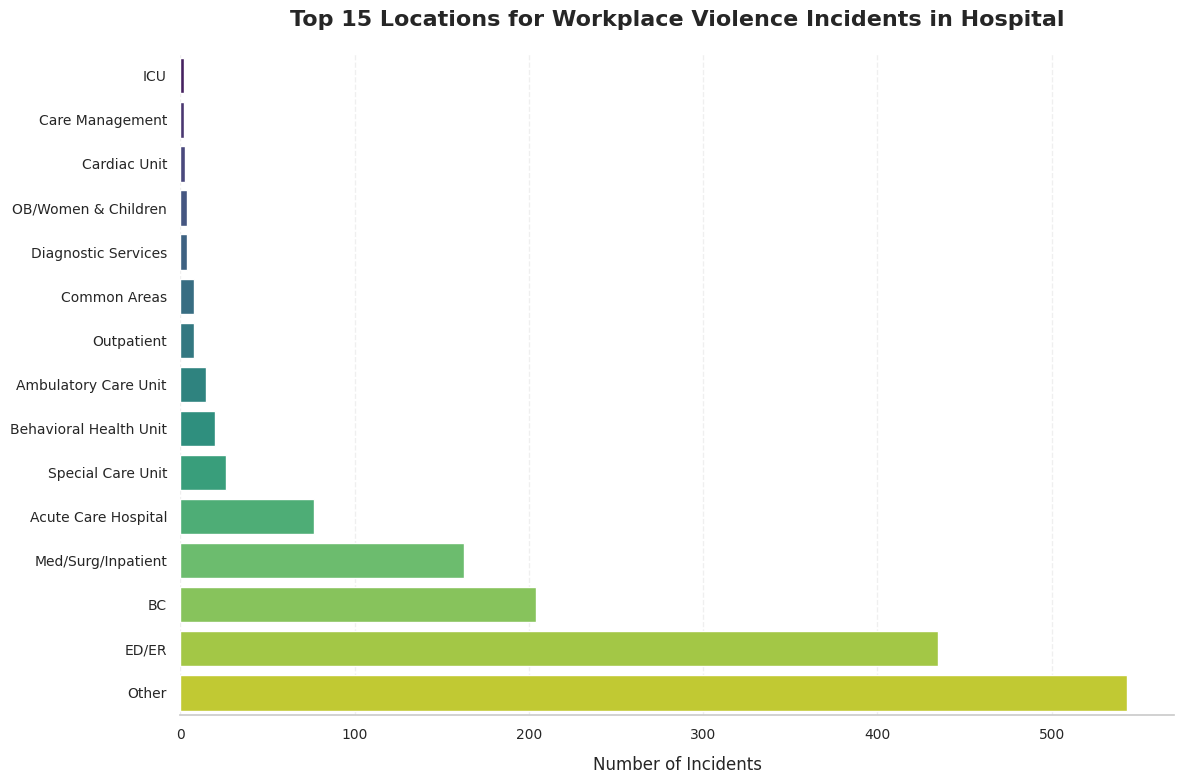

In [126]:
# Get value counts and select top N locations
top_n = 15  # Show top 15 locations - adjust as needed
location_counts = df['General Location'].value_counts().sort_values(ascending=True)  # Sort ascending for horizontal bar
top_locations = location_counts.tail(top_n)  # Get largest N values

# Create figure
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=top_locations.values, y=top_locations.index, palette="viridis")

# Customize appearance
plt.title(f'Top {top_n} Locations for Workplace Violence Incidents in Hospital',
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Number of Incidents', fontsize=12, labelpad=10)
plt.ylabel('')  # Remove y-label since categories are self-explanatory
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add value labels with improved formatting
for i, count in enumerate(top_locations.values):
    # Place text inside bar for light colors, outside for dark
    color = bar_plot.patches[i].get_facecolor()
    brightness = sum(color[:3])/3  # Simple brightness calculation
    text_color = 'white' if brightness < 0.6 else 'black'
    x_pos = count if brightness < 0.6 else count + 0.5
    bar_plot.text(x_pos, i,
                 f"{count:,}",  # Format with thousands separator
                 va='center',
                 color=text_color,
                 fontsize=10,
                 fontweight='bold' if brightness < 0.6 else None)

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Remove spines for cleaner look
sns.despine(left=True)

plt.tight_layout()
plt.show()

<ipython-input-127-dbdaf593117c>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




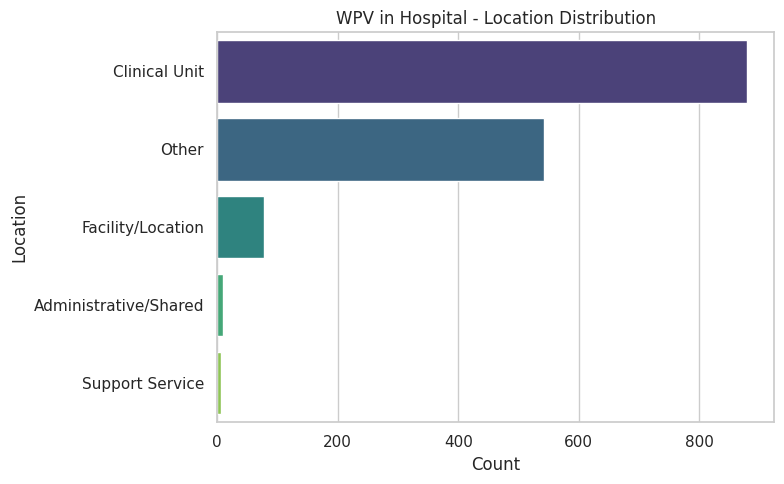

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Count the occurrences of each group
group_counts = df['General Advanced Location'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=group_counts.values, y=group_counts.index, palette="viridis")
plt.title("WPV in Hospital - Location Distribution")
plt.xlabel("Count")
plt.ylabel("Location")
plt.tight_layout()
plt.show()


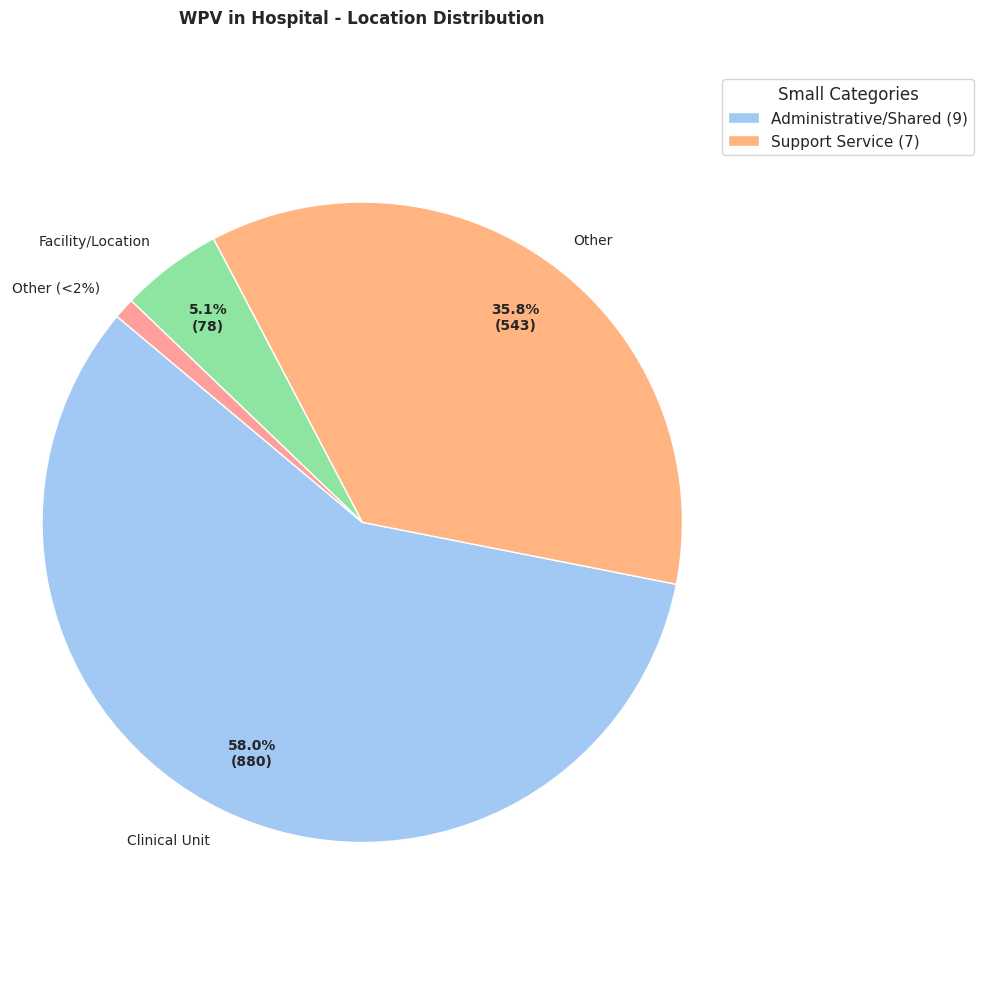

In [128]:
plt.figure(figsize=(10, 10))  # Increased figure size

# Get value counts and prepare data
location_counts = df['General Advanced Location'].value_counts()
total = location_counts.sum()
threshold = total * 0.02  # 2% threshold - adjust as needed

# Group small categories into "Other"
main_categories = location_counts[location_counts >= threshold]
other_count = location_counts[location_counts < threshold].sum()

if other_count > 0:
    main_categories['Other (<2%)'] = other_count

# Create custom autopct function to show both % and count
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:,})' if pct > 3 else ''
    return my_autopct

# Plot with improved settings
patches, texts, autotexts = plt.pie(
    main_categories,
    labels=main_categories.index,
    autopct=make_autopct(main_categories),
    startangle=140,
    colors=sns.color_palette("pastel"),
    pctdistance=0.8,
    textprops={'fontsize': 10}
)

# Improve label appearance
plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=10)

# Equal aspect ratio ensures pie is drawn as circle
plt.axis('equal')

# Add legend for small categories
if other_count > 0:
    plt.legend(
        loc='upper left',
        bbox_to_anchor=(1, 1),
        title='Small Categories',
        labels=[f'{k} ({v:,})' for k,v in location_counts[location_counts < threshold].items()]
    )

plt.title('WPV in Hospital - Location Distribution\n',
          pad=20, fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

In [93]:
# Create summary table
summary = df['General Advanced Location'].value_counts().reset_index()
summary.columns = ['General Advanced Location', 'Count']
summary['Percentage'] = (summary['Count'] / summary['Count'].sum() * 100).round(1)

print(summary)

  General Advanced Location  Count  Percentage
0             Clinical Unit    880        58.0
1                     Other    543        35.8
2         Facility/Location     78         5.1
3     Administrative/Shared      9         0.6
4           Support Service      7         0.5


In [129]:
df.head()

,Event Date,Facility Type,Department/Office Incident Took Place,Occupational Category of Person Affected,Aggressor,Type of Violence,Primary Contributing Factors,Severity of Assault,Primary Assault Description,Assault Description,Emotional and/ or Psychological Impact,Level of Care Needed,Response Action Taken,General Location,General Advanced Location
0,1/9/2024,ED,Nurses station,"Nurse (RN, LPN), Nurse (RN, LPN)",Patient,"Physical, Verbal",Homelessness/Lack of Housing,Mild - Mild Soreness/Abrasions/Scratches/Small...,"Verbal Assault, Pushing/Shoving, Harassment",Head-butted another patient,Mild - Upset/Angry/Scared/Humiliated,NaN,"Security Called, Law Enforcement Called, De-es...",ED/ER,Clinical Unit
1,2/6/2024,ED,Patient room,"Nurse (RN, LPN), Security, Allied Health/Techn...",Patient,"Physical, Verbal","Altered Mental Status, Inpatient Bed Unavailable",None - No Contact/Unwanted Contact w/No Injury,"Grabbing/Pinching/Scratching/Hair Pull, Kickin...",NaN,None - No emotional and/or Psychological Impact,NaN,"Security Called, Law Enforcement Called, Physi...",ED/ER,Clinical Unit
2,2/9/2024,ED,Patient room,"Nurse (RN, LPN), Physician/Advanced Practice P...",Patient,"Physical, Verbal",Inpatient Bed Unavailable,None - No Contact/Unwanted Contact w/No Injury,"Posturing, Throwing Object/Breaking Object",NaN,None - No emotional and/or Psychological Impact,NaN,"Security Called, Law Enforcement Called, Physi...",ED/ER,Clinical Unit
3,2/8/2024,ED,Patient room,"Nurse (RN, LPN), Physician/Advanced Practice P...",Patient,Verbal,Inpatient Bed Unavailable,None - No Contact/Unwanted Contact w/No Injury,"Harassment, Verbal Assault, Posturing",NaN,None - No emotional and/or Psychological Impact,NaN,"Emergency Call/Code, De-escalation Techniques,...",ED/ER,Clinical Unit
4,2/9/2024,ED,Behavioral health unit,"Nurse (RN, LPN)",Patient,"Physical, Verbal",Inpatient Bed Unavailable,None - No Contact/Unwanted Contact w/No Injury,"Posturing, Throwing Object/Breaking Object, Ve...",Attempting to break windows,None - No emotional and/or Psychological Impact,NaN,"Security Called, Seclusion of Patient",ED/ER,Clinical Unit


In [114]:
df.to_csv('4_5_all_standard_location.csv', index=False)